In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('zameen-updated.csv')
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [19]:
# make 5 batches by time with equal number of rows
df['date_added'] = pd.to_datetime(df['date_added'])
df['time'] = (df['date_added'] - pd.Timestamp('2019-04-02')).dt.total_seconds()
df['batch'] = pd.qcut(df['time'], 5, labels=False)
df = df.drop(['time'], axis=1)
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,batch
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,4 Marla,For Sale,2,2019-02-04,NaN,NaN,Marla,4.0,0-5 Marla,0
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,5.6 Marla,For Sale,3,2019-05-04,NaN,NaN,Marla,5.6,5-10 Marla,1
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,8 Marla,For Sale,5,2019-07-17,NaN,NaN,Marla,8.0,5-10 Marla,4
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,2 Kanal,For Sale,4,2019-04-05,NaN,NaN,Kanal,2.0,1-5 Kanal,0
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,8 Marla,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,...,9.6 Marla,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,4
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,...,8 Marla,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla,4
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,...,9.6 Marla,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,4
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,...,7.8 Marla,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla,4


In [20]:
df = df[df['batch'] == 0]
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,batch
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,4 Marla,For Sale,2,2019-02-04,NaN,NaN,Marla,4.0,0-5 Marla,0
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,2 Kanal,For Sale,4,2019-04-05,NaN,NaN,Kanal,2.0,1-5 Kanal,0
5,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,...,1.6 Kanal,For Sale,8,2019-04-05,NaN,NaN,Kanal,1.6,1-5 Kanal,0
6,937975,445,https://www.zameen.com/Property/islamabad_kora...,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,...,1 Kanal,For Sale,8,2019-01-04,NaN,NaN,Kanal,1.0,1-5 Kanal,0
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,...,1 Kanal,For Sale,7,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59919,15825668,6699,https://www.zameen.com/Property/federal_b_area...,House,19000000,Federal B Area,Karachi,Sindh,24.929408,67.080710,...,4.8 Marla,For Sale,4,2019-04-09,M N B Associates,MNasir,Marla,4.8,0-5 Marla,0
59963,15826411,9700,https://www.zameen.com/Property/karachi_falakn...,Flat,6000000,Falaknaz Presidency,Karachi,Sindh,24.927051,67.173994,...,3.8 Marla,For Sale,0,2019-04-09,Bahria Al-Falah Estate & Builders,Tariq,Marla,3.8,0-5 Marla,0
59970,15827169,1483,https://www.zameen.com/Property/d_h_a_dha_phas...,Flat,9500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,...,4.2 Marla,For Sale,2,2019-04-09,Pary Enterprises,Ali Jamal,Marla,4.2,0-5 Marla,0
59973,15827440,6844,https://www.zameen.com/Property/gulistan_e_jau...,Flat,3500000,Gulistan-e-Jauhar,Karachi,Sindh,24.907871,67.115263,...,6 Marla,For Sale,0,2019-04-09,Ali Real Estate,Faizi,Marla,6.0,5-10 Marla,0


In [21]:
df.nunique()

property_id      34202
location_id       3225
page_url         34202
property_type        7
price             1059
location          1272
city                 5
province_name        3
latitude          4424
longitude         4774
baths               11
area               269
purpose              2
bedrooms            15
date_added          71
agency            2007
agent             2793
Area Type            2
Area Size          208
Area Category       18
batch                1
dtype: int64

We see that property_type, city, province_name, purpose, area type, area category are maybe good to make one hot encoding

In [22]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size,batch
count,3.420200e+04,34202.000000,3.420200e+04,34202.000000,34202.000000,34202.000000,34202.000000,34202,34202.000000,34202.0
mean,1.379418e+07,4362.517835,1.712434e+07,29.940254,71.236693,3.022601,3.199228,2019-01-10 20:46:57.519443456,5.809651,0.0
min,1.289830e+05,1.000000,1.000000e+00,24.749425,31.389173,0.000000,0.000000,2018-08-05 00:00:00,0.100000,0.0
25%,1.280976e+07,766.000000,1.250000e+05,24.934623,67.116630,2.000000,2.000000,2018-11-19 00:00:00,3.100000,0.0
50%,1.408490e+07,3286.000000,7.500000e+06,31.465275,73.061435,3.000000,3.000000,2019-02-03 00:00:00,5.000000,0.0
75%,1.498971e+07,7210.000000,1.750000e+07,33.564427,73.174596,4.000000,4.000000,2019-03-18 00:00:00,8.000000,0.0
max,1.582777e+07,13769.000000,1.450000e+09,33.812891,74.501450,10.000000,15.000000,2019-04-09 00:00:00,500.000000,0.0
std,1.549990e+06,3765.763824,3.692857e+07,3.822906,3.109260,2.185350,2.075999,NaN,4.798716,0.0


<Axes: ylabel='Frequency'>

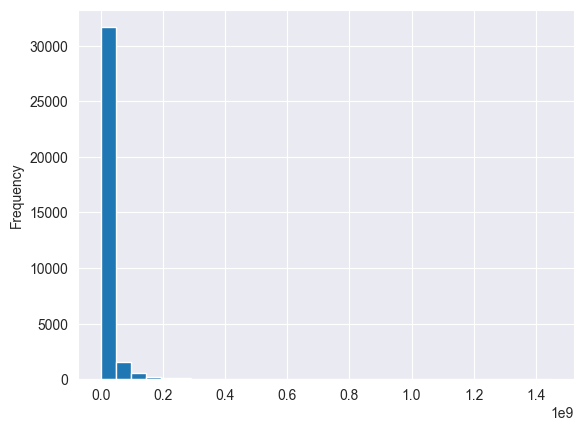

In [23]:
df['price'].plot.hist(bins=30)

We see that price is right skewed and there are abnormally low values, so let's drop the outliers (more than 0.2 * 10^9 or less than 5000)

C:\Users\BulaDick\AppData\Local\Temp\ipykernel_1776\4176289098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['price'] < 0.2 * 10**9][df['price'] > 5000]


<Axes: ylabel='Frequency'>

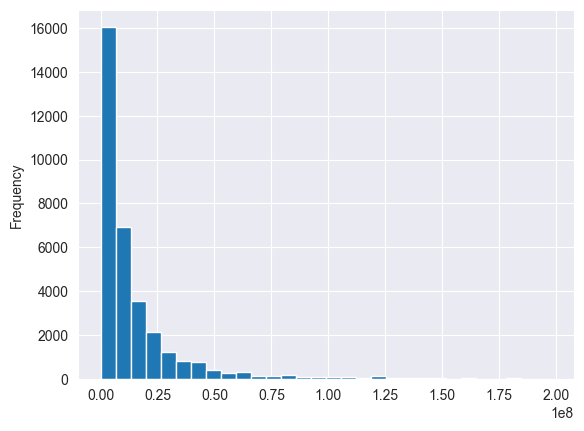

In [24]:
df = df[df['price'] < 0.2 * 10**9][df['price'] > 5000]
df['price'].plot.hist(bins=30)

In [25]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size,batch
count,3.394600e+04,33946.000000,3.394600e+04,33946.000000,33946.000000,33946.000000,33946.000000,33946,33946.000000,33946.0
mean,1.379456e+07,4376.455989,1.505947e+07,29.952120,71.246290,3.012166,3.186649,2019-01-10 15:20:46.520945152,5.811006,0.0
min,1.289830e+05,1.000000,5.500000e+03,24.749425,31.389173,0.000000,0.000000,2018-08-05 00:00:00,0.100000,0.0
25%,1.280976e+07,764.000000,1.200000e+05,24.935635,67.119327,2.000000,2.000000,2018-11-19 00:00:00,3.100000,0.0
50%,1.408488e+07,3299.000000,7.500000e+06,31.465367,73.063024,3.000000,3.000000,2019-02-03 00:00:00,5.000000,0.0
75%,1.498712e+07,7214.000000,1.700000e+07,33.564427,73.174596,4.000000,4.000000,2019-03-18 00:00:00,8.000000,0.0
max,1.582777e+07,13769.000000,1.980000e+08,33.812891,74.501450,10.000000,14.000000,2019-04-09 00:00:00,500.000000,0.0
std,1.545051e+06,3769.178149,2.425364e+07,3.818851,3.106105,2.170193,2.057713,NaN,4.591943,0.0


Also we see that minimal longitude is about 31, so we can drop those values that cannot be interpreted as Pakistan (since zameen.com is a site with Pakistan property)
American Institute of Pakistan Studies says "Pakistan lies between 23 degrees 35 minutes to 37 degrees 05 minutes North latitude and 60 degrees 50 minutes to 77 degrees 50 minutes east longitude." (https://www.pakistanstudies-aips.org/pakistan/geography#:~:text=Pakistan%20lies%20between%2023%20degrees%2035%20minutes%20to%2037%20degrees%2005%20minutes%20North%20latitude%20and%2060%20degrees%2050%20minutes%20to%2077%20degrees%2050%20minutes%20east%20longitude)
Let's cut off data with this coordinates taking some margin just in case - latitude from 22 to 38, longitude from 59 to 79

In [26]:
df = df[df['latitude'] > 22][df['latitude'] < 38]
df = df[df['longitude'] > 59][df['longitude'] < 79]

C:\Users\BulaDick\AppData\Local\Temp\ipykernel_1776\4129420784.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['longitude'] > 59][df['longitude'] < 79]


In [27]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size,batch
count,3.394500e+04,33945.000000,3.394500e+04,33945.000000,33945.000000,33945.000000,33945.000000,33945,33945.000000,33945.0
mean,1.379454e+07,4376.245397,1.505969e+07,29.952078,71.247464,3.012167,3.186655,2019-01-10 15:19:11.427308800,5.811000,0.0
min,1.289830e+05,1.000000,5.500000e+03,24.749425,66.842040,0.000000,0.000000,2018-08-05 00:00:00,0.100000,0.0
25%,1.280952e+07,764.000000,1.200000e+05,24.935635,67.119327,2.000000,2.000000,2018-11-19 00:00:00,3.100000,0.0
50%,1.408488e+07,3299.000000,7.500000e+06,31.465422,73.063024,3.000000,3.000000,2019-02-03 00:00:00,5.000000,0.0
75%,1.498725e+07,7214.000000,1.700000e+07,33.564427,73.174596,4.000000,4.000000,2019-03-18 00:00:00,8.000000,0.0
max,1.582777e+07,13769.000000,1.980000e+08,33.812891,74.501450,10.000000,14.000000,2019-04-09 00:00:00,500.000000,0.0
std,1.545069e+06,3769.033953,2.425396e+07,3.818899,3.098608,2.170224,2.057743,NaN,4.592011,0.0


From the number of rows we see that it was only 1 outlier with incorrect coordinates. This proves that it was outlier.
Since 20 marla = 1 kanal, we can easily convert kanal to marla and get final area in marla, so no need to keep area category and one not encode it

In [28]:
df = df.drop(['property_id', 'page_url'], axis=1)
area_marla = np.where(df['Area Type'] == 'Kanal', df['Area Size'] * 20, df['Area Size'])
df['area'] = area_marla
df = df.drop(['Area Type', 'Area Size', 'Area Category'], axis=1)
df

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,batch
0,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,2,2019-02-04,NaN,NaN,0
3,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0,For Sale,4,2019-04-05,NaN,NaN,0
5,3390,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,32.0,For Sale,8,2019-04-05,NaN,NaN,0
6,445,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,20.0,For Sale,8,2019-01-04,NaN,NaN,0
8,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,20.0,For Sale,7,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59919,6699,House,19000000,Federal B Area,Karachi,Sindh,24.929408,67.080710,4,4.8,For Sale,4,2019-04-09,M N B Associates,MNasir,0
59963,9700,Flat,6000000,Falaknaz Presidency,Karachi,Sindh,24.927051,67.173994,0,3.8,For Sale,0,2019-04-09,Bahria Al-Falah Estate & Builders,Tariq,0
59970,1483,Flat,9500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,2,4.2,For Sale,2,2019-04-09,Pary Enterprises,Ali Jamal,0
59973,6844,Flat,3500000,Gulistan-e-Jauhar,Karachi,Sindh,24.907871,67.115263,0,6.0,For Sale,0,2019-04-09,Ali Real Estate,Faizi,0


In [29]:
df.isnull().sum() / len(df)

location_id      0.000000
property_type    0.000000
price            0.000000
location         0.000000
city             0.000000
province_name    0.000000
latitude         0.000000
longitude        0.000000
baths            0.000000
area             0.000000
purpose          0.000000
bedrooms         0.000000
date_added       0.000000
agency           0.666372
agent            0.666372
batch            0.000000
dtype: float64

Since agency and agent are null when individual sells the property, we can fill the null values with '-' in both columns

In [30]:
df['agency'] = df['agency'].fillna('-')
df['agent'] = df['agent'].fillna('-')
df

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,batch
0,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,2,2019-02-04,-,-,0
3,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,40.0,For Sale,4,2019-04-05,-,-,0
5,3390,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,32.0,For Sale,8,2019-04-05,-,-,0
6,445,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,20.0,For Sale,8,2019-01-04,-,-,0
8,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,20.0,For Sale,7,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59919,6699,House,19000000,Federal B Area,Karachi,Sindh,24.929408,67.080710,4,4.8,For Sale,4,2019-04-09,M N B Associates,MNasir,0
59963,9700,Flat,6000000,Falaknaz Presidency,Karachi,Sindh,24.927051,67.173994,0,3.8,For Sale,0,2019-04-09,Bahria Al-Falah Estate & Builders,Tariq,0
59970,1483,Flat,9500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,2,4.2,For Sale,2,2019-04-09,Pary Enterprises,Ali Jamal,0
59973,6844,Flat,3500000,Gulistan-e-Jauhar,Karachi,Sindh,24.907871,67.115263,0,6.0,For Sale,0,2019-04-09,Ali Real Estate,Faizi,0


In [31]:
df.isnull().sum() / len(df)

location_id      0.0
property_type    0.0
price            0.0
location         0.0
city             0.0
province_name    0.0
latitude         0.0
longitude        0.0
baths            0.0
area             0.0
purpose          0.0
bedrooms         0.0
date_added       0.0
agency           0.0
agent            0.0
batch            0.0
dtype: float64

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Flat'

We don't see any numerical feature need to be dropped looking at correlation matrix

In [ ]:
# print average price of each city
cities = df['city'].unique()
for city in cities:
    print(f'{city}: {df[df["city"] == city]["price"].mean()}')

In [ ]:
# print average price of each property type
property_types = df['property_type'].unique()
for property_type in property_types:
    print(f'{property_type}: {df[df["property_type"] == property_type]["price"].mean()}')

We see that city and property type are important, so we will one-hot encode them

In [ ]:
# one hot encode
cities = pd.get_dummies(df['city'])
df = df.drop('city', axis=1)
df = df.join(cities)
properties = pd.get_dummies(df['property_type'])
df = df.drop('property_type', axis=1)
df = df.join(properties)
df

In [ ]:
df['agency'].value_counts()

In [ ]:
df['agent'].value_counts()

since there are too much unique values of agency and agent (2002 and 2779, respectively), we need to conduct PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=500).fit(pd.get_dummies(df['agency']))
agency_pca = pca.transform(pd.get_dummies(df['agency']))
print(pca.n_components_, pca.explained_variance_ratio_.sum())

In [ ]:
pca = PCA(n_components=500).fit(pd.get_dummies(df['agent']))
agent_pca = pca.transform(pd.get_dummies(df['agent']))
print(pca.n_components_, pca.explained_variance_ratio_.sum())

In [ ]:
df = df.drop(['agency', 'agent'], axis=1)
df = df.join(pd.DataFrame(agency_pca), rsuffix='_agency')
df = df.join(pd.DataFrame(agent_pca), rsuffix='_agent')
df